In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!ls "/content/drive/My Drive/Dataset"

SmartMeat


In [6]:
directory = "/content/drive/My Drive/Dataset/SmartMeat"

In [7]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['Fresh', 'Spoiled']
2


In [8]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [9]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<=800:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [10]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [11]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [12]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [13]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [14]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1281, 100, 100, 3)
(321, 100, 100, 3)
(1281, 2)
(321, 2)


In [15]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [16]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 1s 0us/step


In [17]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
41/41 [==============================] - 31s 240ms/step - loss: 0.5783 - accuracy: 0.7479 - val_loss: 0.4274 - val_accuracy: 0.7508
Epoch 2/20
41/41 [==============================] - 4s 101ms/step - loss: 0.3431 - accuracy: 0.8564 - val_loss: 0.1604 - val_accuracy: 0.9907
Epoch 3/20
41/41 [==============================] - 6s 141ms/step - loss: 0.1682 - accuracy: 0.9375 - val_loss: 0.0479 - val_accuracy: 1.0000
Epoch 4/20
41/41 [==============================] - 4s 107ms/step - loss: 0.1364 - accuracy: 0.9500 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 5/20
41/41 [==============================] - 4s 100ms/step - loss: 0.1306 - accuracy: 0.9524 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch 6/20
41/41 [==============================] - 6s 140ms/step - loss: 0.1125 - accuracy: 0.9625 - val_loss: 0.0204 - val_accuracy: 1.0000
Epoch 7/20
41/41 [==============================] - 4s 100ms/step - loss: 0.1107 - accuracy: 0.9586 - val_loss: 0.0201 - val_accuracy: 1.0000
Epoch

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

#Save Model to HDF5

In [21]:
directory = "/content/drive/My Drive/Dataset/SmartMeat"
model.save('test-model/test-model.h5', overwrite=True, include_optimizer=True)

In [22]:
# ls test-model/test-model.h5

In [23]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

11/11 [==============================] - 5s 71ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       158

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321



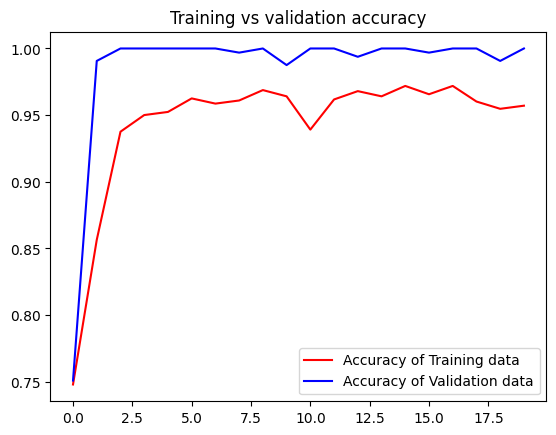

<Figure size 640x480 with 0 Axes>

In [24]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

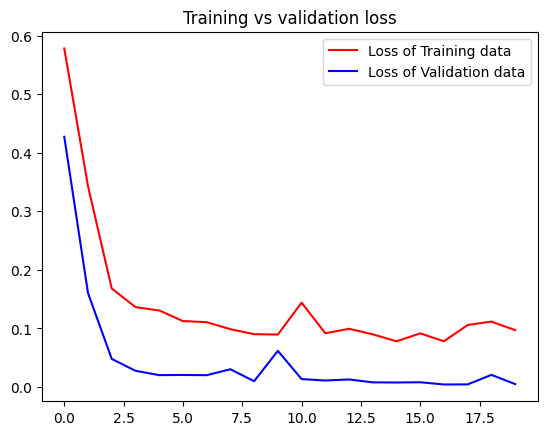

<Figure size 640x480 with 0 Axes>

In [25]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

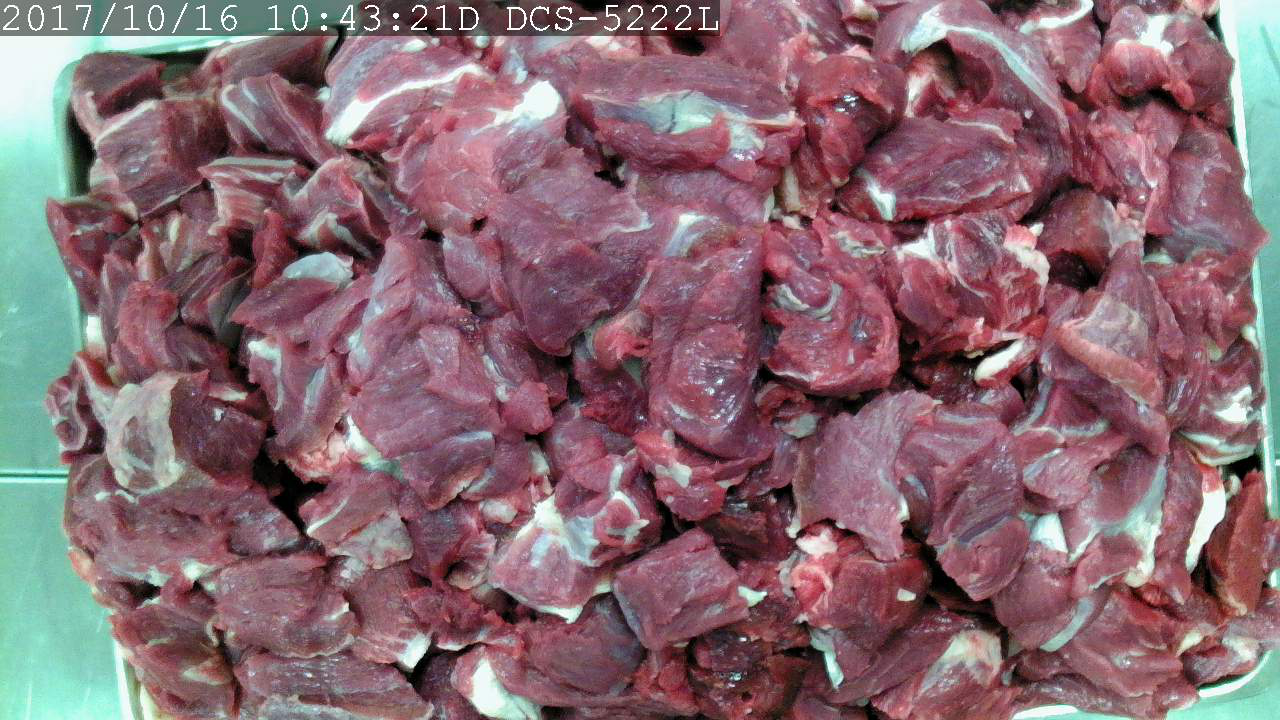

In [26]:
# var = "test_20171016_104321D.jpg"
load_img("/content/drive/My Drive/Dataset/SmartMeat/Fresh/test_20171016_104321D.jpg")

In [27]:
image=load_img("/content/drive/My Drive/Dataset/SmartMeat/Fresh/test_20171016_104321D.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [28]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 87ms/step
Prediction is Fresh.


In [29]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(311, 100, 100, 3)
10/10 [==============================] - 2s 249ms/step
(311, 2)


In [30]:
ANS=tlabels0

In [31]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.7170418006430869
